# Strong selection

In [3]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

from matplotlib.patches import Rectangle

import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")

import mpld3

## Freqency trajectory with deterministic selection

$$ f_A(t) = \frac{f_A(0)}{f_A(0) + (1-s)^t f_a(0)}$$

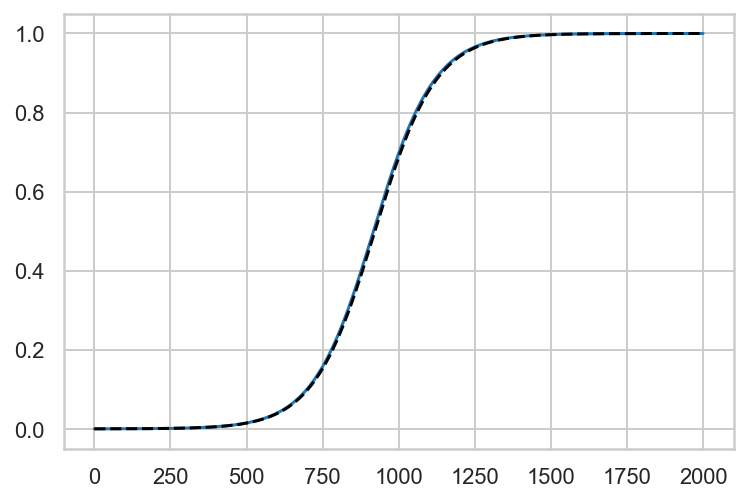

In [5]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

def haploid_trajectory(t, s, p):
    return p / (p + (1-s)**t * (1-p))

def logistic_function(t, s, p):
    ts = -(2/(2*N*s)) * np.log(p)    
    return p / (p + (1-p) * np.exp(-s*(t-ts)))

plt.plot([haploid_trajectory(x, 0.01, 1/10000) for x in range(2000)])
plt.plot([logistic_function(x, 0.01, 1/10000) for x in range(2000)], color='black', linestyle='dashed') ;

## Frequency trajectory with strong selection and genetic drift

In [6]:
def freq_trajectory(N, n=1, s=0):
    yield n
    while N > n > 0:
        n = np.random.binomial(N, n*(1+s)/((N-n)+(n)*(1+s)), 1)[0]
        yield n

In [7]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

# try out:
# N=100, s=0.01, 
# N=10000, s=0.001, N=10000, s=0.01

fig = plt.figure(figsize=(12, 4))
for i in range(100):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 2000)
plt.ylim(0, 10000)
mpld3.display(fig)

Most advantagous mutations are lost, but when frequencies get above a threshhold, trajectory is largely deterministic:

In [ ]:
# Number of alleles at onset of selection
n = 10 # <- NB
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

fig = plt.figure(figsize=(12, 4))
for i in range(10):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 2000)
plt.ylim(0, 10000)
mpld3.display(fig)

## Fixation time

Strong selection $N_e s \gg 1$:

$$\bar{t} \approx \frac{2 \ln (2N_e)}{s}$$

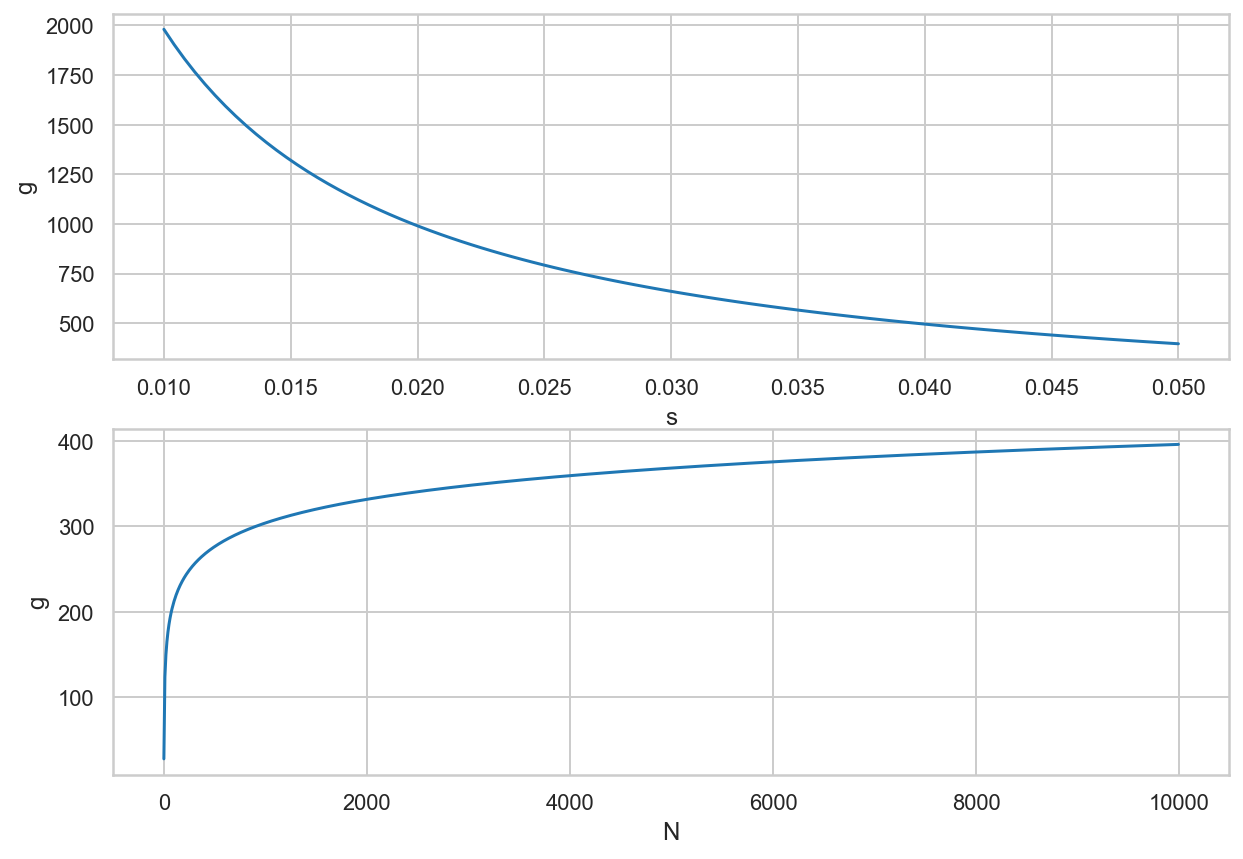

In [8]:
def fixation_time(s, N):
    return 2 * math.log(2*N) / s

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
s_list = np.linspace(0.01, 0.05, 100)
ax1.plot(s_list, [fixation_time(s, 10000) for s in s_list])
ax1.set_xlabel('s')
ax1.set_ylabel('g')

N_list = range(1, 10000, 10)
ax2.plot(N_list, [fixation_time(0.05, N) for N in N_list])
ax2.set_xlabel('N')
ax2.set_ylabel('g') ;